In [100]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
current_folder = os.getcwd()

file_path = os.path.join(current_folder,'..' ,'resource', 'RSMC_Best_Track_Data.csv')

In [102]:
df = pd.read_csv(file_path)
df.head()

,International number ID,Name of the storm,Time of analysis,Grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longest radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longest radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
0,5101,NaN,1951-02-19 06:00:00,Tropical Depression (TD),20.0,138.5,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,5101,NaN,1951-02-19 12:00:00,Tropical Depression (TD),20.0,138.5,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,5101,NaN,1951-02-19 18:00:00,Tropical Depression (TD),23.0,142.1,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,5101,NaN,1951-02-20 00:00:00,Tropical Cyclone of TS intensity or higher,25.0,146.0,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,5101,NaN,1951-02-20 06:00:00,Tropical Cyclone of TS intensity or higher,27.6,150.6,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68750 entries, 0 to 68749
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   International number ID                                   68750 non-null  int64  
 1   Name of the storm                                         66973 non-null  object 
 2   Time of analysis                                          68750 non-null  object 
 3   Grade                                                     68750 non-null  object 
 4   Latitude of the center                                    68750 non-null  float64
 5   Longitude of the center                                   68750 non-null  float64
 6   Central pressure                                          68750 non-null  int64  
 7   Maximum sustained wind speed                              43482 non-null  float64
 8   Direction of the

In [104]:
counts = df['International number ID'].value_counts()

max_count = counts.max()
min_count = counts.min()
median_count = counts.median()
mean_count = counts.mean()

print(f"max: {max_count}")
print(f"min: {min_count}")
print(f"median: {median_count}")
print(f"mean: {mean_count}")
print(f"count: {counts}")

max: 111
min: 2
median: 35.0
mean: 36.49150743099788
count: International number ID
1705    111
116      99
1106     97
1109     94
14       93
       ... 
210       5
1314      3
7013      3
5620      3
6112      2
Name: count, Length: 1884, dtype: int64


Unique value, to convert to numerical values

In [105]:
df['Grade'].unique() # since it has explicit standard according to the wind speed, so no need to convert.

array(['Tropical Depression (TD)',
       'Tropical Cyclone of TS intensity or higher',
       'Extra-tropical Cyclone (L)',
       'Just entering into the responsible area of RSMC Tokyo-Typhoon Center',
       'Severe Tropical Storm (STS)', 'Tropical Storm (TS)',
       'Typhoon (TY)'], dtype=object)

In [106]:
df['Direction of the longest radius of 30kt winds or greater'].unique()

array([nan, '(symmetric circle)', 'Northeast (NE)', 'South (S)',
       'East (E)', 'Southeast (SE)', 'West (W)', 'North (N)',
       'Northwest (NW)', 'Southwest (SW)'], dtype=object)

In [107]:
direction_30_mapping = {'(symmetric circle)': 1, 'Northeast (NE)': 6, 'South (S)': 3,
       'East (E)': 5, 'Southeast (SE)': 9, 'West (W)': 4, 'North (N)': 2,
       'Northwest (NW)': 6, 'Southwest (SW)': 8}
df['Direction of the longest radius of 30kt winds or greater'] = df['Direction of the longest radius of 30kt winds or greater'].map(direction_30_mapping)

In [108]:
direction_50_mapping = {'(symmetric circle)': 1, 'Northeast (NE)': 6, 'South (S)': 3,
       'East (E)': 5, 'Southeast (SE)': 9, 'West (W)': 4, 'North (N)': 2,
       'Northwest (NW)': 6, 'Southwest (SW)': 8, 'No direction (Longest radius of 50kt winds is 0)': 9}
df['Direction of the longest radius of 50kt winds or greater'] = df['Direction of the longest radius of 50kt winds or greater'].map(direction_50_mapping)

In [109]:
df['Direction of the longest radius of 50kt winds or greater'].unique()

array([nan,  9.,  1.,  6.,  5.,  2.,  4.,  3.,  8.])

In [110]:
df['Indicator of landfall or passage'].unique()

array([' ', '#'], dtype=object)

In [111]:
indicator_mapping = {'#': 1, ' ': 0}
df['Indicator of landfall or passage'] = df['Indicator of landfall or passage'].map(indicator_mapping)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68750 entries, 0 to 68749
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   International number ID                                   68750 non-null  int64  
 1   Name of the storm                                         66973 non-null  object 
 2   Time of analysis                                          68750 non-null  object 
 3   Grade                                                     68750 non-null  object 
 4   Latitude of the center                                    68750 non-null  float64
 5   Longitude of the center                                   68750 non-null  float64
 6   Central pressure                                          68750 non-null  int64  
 7   Maximum sustained wind speed                              43482 non-null  float64
 8   Direction of the

Make DF ready for correlation matrix

In [113]:
df = df.drop(['International number ID', 'Name of the storm' ,'Grade'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68750 entries, 0 to 68749
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Time of analysis                                          68750 non-null  object 
 1   Latitude of the center                                    68750 non-null  float64
 2   Longitude of the center                                   68750 non-null  float64
 3   Central pressure                                          68750 non-null  int64  
 4   Maximum sustained wind speed                              43482 non-null  float64
 5   Direction of the longest radius of 50kt winds or greater  27299 non-null  float64
 6   The longest radius of 50kt winds or greater               27299 non-null  float64
 7   The shortest radius of 50kt winds or greater              27299 non-null  float64
 8   Direction of the

Make dataset for model building   
Only remain the rows that contains.....

In [114]:
columns_to_check = [
    'Direction of the longest radius of 50kt winds or greater',
    'The longest radius of 50kt winds or greater',
    'The shortest radius of 50kt winds or greater',
    'Direction of the longest radius of 30kt winds or greater',
    'The longest radius of 30kt winds or greater',
    'The shortest radius of 30kt winds or greater'
]
df = df.dropna(subset=columns_to_check)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27299 entries, 25272 to 68731
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Time of analysis                                          27299 non-null  object 
 1   Latitude of the center                                    27299 non-null  float64
 2   Longitude of the center                                   27299 non-null  float64
 3   Central pressure                                          27299 non-null  int64  
 4   Maximum sustained wind speed                              27299 non-null  float64
 5   Direction of the longest radius of 50kt winds or greater  27299 non-null  float64
 6   The longest radius of 50kt winds or greater               27299 non-null  float64
 7   The shortest radius of 50kt winds or greater              27299 non-null  float64
 8   Direction of the 

In [115]:
df.sample(5)

,Time of analysis,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longest radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longest radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
67997,2022-07-01 00:00:00,20.1,131.0,998,40.0,9.0,0.0,0.0,5.0,180.0,90.0,0
58322,2011-09-28 12:00:00,18.7,135.9,990,50.0,9.0,0.0,0.0,2.0,80.0,50.0,0
43503,1994-10-31 06:00:00,26.0,139.2,990,45.0,9.0,0.0,0.0,1.0,240.0,240.0,0
61336,2015-04-04 06:00:00,15.2,125.1,980,55.0,1.0,30.0,30.0,6.0,110.0,80.0,0
60719,2014-08-04 00:00:00,16.5,130.7,930,95.0,1.0,100.0,100.0,3.0,270.0,200.0,0


In [116]:
one_hot_encoded = pd.get_dummies(df['Direction of the longest radius of 50kt winds or greater'],prefix = 'Direction of the longest radius of 50kt winds or greater', dtype = int)
df = pd.concat([df, one_hot_encoded], axis = 1)

one_hot_encoded2 = pd.get_dummies(df['Direction of the longest radius of 30kt winds or greater'], prefix= 'Direction of the longest radius of 30kt winds or greater', dtype = int)
df = pd.concat([df, one_hot_encoded2], axis = 1)

df.tail()

,Time of analysis,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longest radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longest radius of 30kt winds or greater,...,Direction of the longest radius of 50kt winds or greater_8.0,Direction of the longest radius of 50kt winds or greater_9.0,Direction of the longest radius of 30kt winds or greater_1.0,Direction of the longest radius of 30kt winds or greater_2.0,Direction of the longest radius of 30kt winds or greater_3.0,Direction of the longest radius of 30kt winds or greater_4.0,Direction of the longest radius of 30kt winds or greater_5.0,Direction of the longest radius of 30kt winds or greater_6.0,Direction of the longest radius of 30kt winds or greater_8.0,Direction of the longest radius of 30kt winds or greater_9.0
68727,2023-06-11 06:00:00,24.2,132.6,975,60.0,9.0,80.0,60.0,9.0,270.0,...,0,1,0,0,0,0,0,0,0,1
68728,2023-06-11 12:00:00,25.6,133.8,980,55.0,9.0,80.0,60.0,9.0,300.0,...,0,1,0,0,0,0,0,0,0,1
68729,2023-06-11 18:00:00,26.4,135.3,980,55.0,9.0,70.0,50.0,9.0,300.0,...,0,1,0,0,0,0,0,0,0,1
68730,2023-06-12 00:00:00,27.9,136.9,980,55.0,9.0,60.0,40.0,9.0,300.0,...,0,1,0,0,0,0,0,0,0,1
68731,2023-06-12 06:00:00,29.5,138.1,985,50.0,9.0,0.0,0.0,9.0,300.0,...,0,1,0,0,0,0,0,0,0,1


In [117]:
df = df.drop(['Direction of the longest radius of 50kt winds or greater', 'Direction of the longest radius of 30kt winds or greater'], axis=1)

In [118]:
df['Time of analysis'] = pd.to_datetime(df['Time of analysis'])
df['Time of analysis'] = df['Time of analysis'].apply(lambda x: x.timestamp())
df['Time of analysis']

25272    2.283552e+08
25273    2.283768e+08
25274    2.283984e+08
25275    2.284200e+08
25276    2.284416e+08
             ...     
68727    1.686463e+09
68728    1.686485e+09
68729    1.686506e+09
68730    1.686528e+09
68731    1.686550e+09
Name: Time of analysis, Length: 27299, dtype: float64

MaxMinScaler

In [119]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = df.columns[:]

# 复制 DataFrame 以免修改原始数据
df_normalized = df.copy()

# 实例化 MinMaxScaler
scaler = MinMaxScaler()

# 对选择的列进行归一化
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# 打印处理后的新 DataFrame 的信息
df_normalized.tail()

,Time of analysis,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,The longest radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,The longest radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage,...,Direction of the longest radius of 50kt winds or greater_8.0,Direction of the longest radius of 50kt winds or greater_9.0,Direction of the longest radius of 30kt winds or greater_1.0,Direction of the longest radius of 30kt winds or greater_2.0,Direction of the longest radius of 30kt winds or greater_3.0,Direction of the longest radius of 30kt winds or greater_4.0,Direction of the longest radius of 30kt winds or greater_5.0,Direction of the longest radius of 30kt winds or greater_6.0,Direction of the longest radius of 30kt winds or greater_8.0,Direction of the longest radius of 30kt winds or greater_9.0
68727,0.999941,0.468041,0.413915,0.750000,0.238095,0.246154,0.24,0.301205,0.25,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68728,0.999956,0.496907,0.428066,0.785714,0.190476,0.246154,0.24,0.337349,0.25,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68729,0.999970,0.513402,0.445755,0.785714,0.190476,0.215385,0.20,0.337349,0.25,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68730,0.999985,0.544330,0.464623,0.785714,0.190476,0.184615,0.16,0.337349,0.25,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68731,1.000000,0.577320,0.478774,0.821429,0.142857,0.000000,0.00,0.337349,0.25,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
# print(df_normalized['Time of analysis'].dtype)
# df_normalized['Time of analysis'] = pd.to_datetime(df_normalized['Time of analysis'])
# df_normalized['Time of analysis'] = df_normalized['Time of analysis'].apply(lambda x: x.timestamp())

In [121]:
data = df_normalized.copy()
data.head()

,Time of analysis,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,The longest radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,The longest radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage,...,Direction of the longest radius of 50kt winds or greater_8.0,Direction of the longest radius of 50kt winds or greater_9.0,Direction of the longest radius of 30kt winds or greater_1.0,Direction of the longest radius of 30kt winds or greater_2.0,Direction of the longest radius of 30kt winds or greater_3.0,Direction of the longest radius of 30kt winds or greater_4.0,Direction of the longest radius of 30kt winds or greater_5.0,Direction of the longest radius of 30kt winds or greater_6.0,Direction of the longest radius of 30kt winds or greater_8.0,Direction of the longest radius of 30kt winds or greater_9.0
25272,0.000000,0.084536,0.722877,0.857143,0.142857,0.0,0.0,0.126506,0.208333,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25273,0.000015,0.094845,0.715802,0.900000,0.142857,0.0,0.0,0.126506,0.208333,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25274,0.000030,0.105155,0.707547,0.928571,0.142857,0.0,0.0,0.126506,0.208333,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25275,0.000044,0.113402,0.699292,0.942857,0.095238,0.0,0.0,0.096386,0.166667,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25276,0.000059,0.119588,0.689858,0.942857,0.095238,0.0,0.0,0.096386,0.166667,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27299 entries, 25272 to 68731
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Time of analysis                                              27299 non-null  float64
 1   Latitude of the center                                        27299 non-null  float64
 2   Longitude of the center                                       27299 non-null  float64
 3   Central pressure                                              27299 non-null  float64
 4   Maximum sustained wind speed                                  27299 non-null  float64
 5   The longest radius of 50kt winds or greater                   27299 non-null  float64
 6   The shortest radius of 50kt winds or greater                  27299 non-null  float64
 7   The longest radius of 30kt winds or greater                   27299 

In [123]:
split_index = int(0.7 * len(data))

# 分割DataFrame
train_set = data.iloc[:split_index, :]
test_set = data.iloc[split_index:, :]

In [124]:
train_x = train_set.drop(["Latitude of the center", "Longitude of the center"], axis=1)
train_y = train_set.loc[:, ["Latitude of the center", "Longitude of the center"]]
test_x = test_set.drop(["Latitude of the center", "Longitude of the center"], axis=1)
test_y = test_set.loc[:, ["Latitude of the center", "Longitude of the center"]]


x_train = train_x.copy()
y_train = train_y.copy()
x_test = test_x.copy()
y_test = test_y.copy()

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(19109, 24)
(19109, 2)
(8190, 24)
(8190, 2)


### LSTM


In [134]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

print(train_x.shape)
print(test_x.shape)

(19109, 1, 24)
(8190, 1, 24)


In [69]:
from keras.models import Sequential
from keras.layers import LSTM, BatchNormalization, Dropout,Dense
from keras.optimizers import Adam

In [132]:
model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(1, 24)))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(2))


In [135]:
optimizer = Adam(learning_rate=0.00001)
model.compile(loss='mean_absolute_error', optimizer=optimizer)
history = model.fit(train_x, train_y, epochs=1000, batch_size=10, verbose=1)

Epoch 1/1000
1911/1911 [==============================] - 10s 3ms/step - loss: 0.2617
Epoch 2/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1440
Epoch 3/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1365
Epoch 4/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1325
Epoch 5/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1306
Epoch 6/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1293
Epoch 7/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1280
Epoch 8/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1274
Epoch 9/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1272
Epoch 10/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1269
Epoch 11/1000
1911/1911 [==============================] - 6s 3ms/step - loss: 0.1262
Epoch 12/1000
1911/1911 [==============================] - 6s 

In [136]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 128)            78336     
                                                                 
 batch_normalization_2 (Bat  (None, 1, 128)            512       
 chNormalization)                                                
                                                                 
 lstm_9 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_10 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                      

In [146]:
current_folder = os.getcwd()

file_path = os.path.join(current_folder,'..' ,'model')

model.save(file_path + '\\1000-10LSTM.keras')

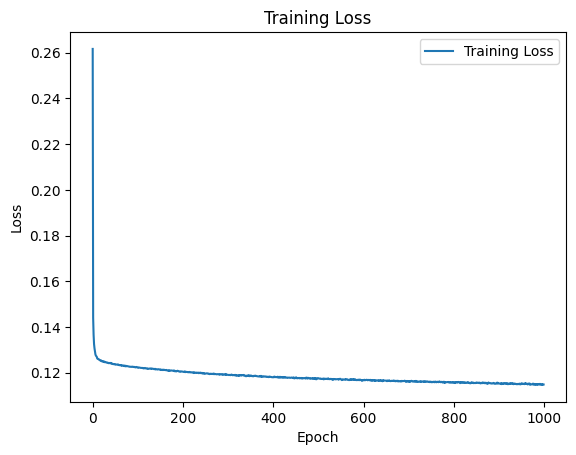

In [140]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [137]:
testPredict = model.predict(test_x)
# testPredict = MinMaxScaler.inverse_transform(testPredict)
testPredict

256/256 [==============================] - 1s 1ms/step


array([[0.6351199 , 0.5953697 ],
       [0.65696585, 0.5684053 ],
       [0.40920264, 0.5484107 ],
       ...,
       [0.7471538 , 0.44931287],
       [0.748526  , 0.4668075 ],
       [0.6985484 , 0.53077203]], dtype=float32)

In [35]:
print(test_y)

       Latitude of the center  Longitude of the center
55644                0.575258                 0.485849
55645                0.597938                 0.503538
55646                0.612371                 0.515330
55658                0.397938                 0.345519
55659                0.426804                 0.360849
...                       ...                      ...
68727                0.468041                 0.413915
68728                0.496907                 0.428066
68729                0.513402                 0.445755
68730                0.544330                 0.464623
68731                0.577320                 0.478774

[8190 rows x 2 columns]


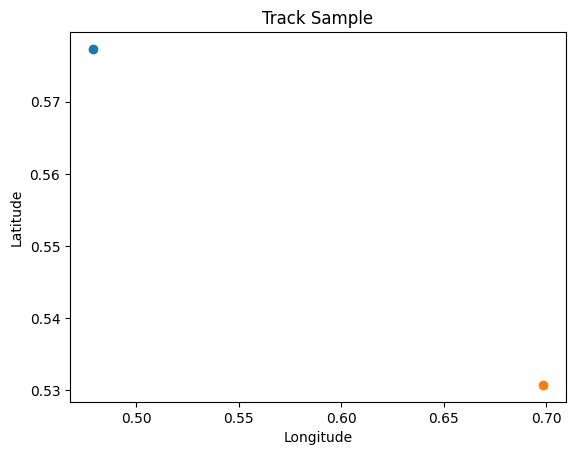

In [148]:
last_20_rows = test_y.tail(1)
last_20_rows_numpy_array = testPredict[-1:]

# 绘制图表
plt.scatter(last_20_rows['Longitude of the center'], last_20_rows['Latitude of the center'])
plt.scatter(last_20_rows_numpy_array[:, 0], last_20_rows_numpy_array[:, 1], label='numpy_array')

# 设置图表标题和轴标签
plt.title('Track Sample')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图表
plt.show()

In [ ]:
# data_restored = scaler.inverse_transform(np.concatenate((test_x, testPredict), axis=1))
# data_restored

### ML Models

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [126]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(x_test)

# 计算预测结果的平均绝对误差（MAE）
mae = mean_absolute_error(y_test, y_pred)

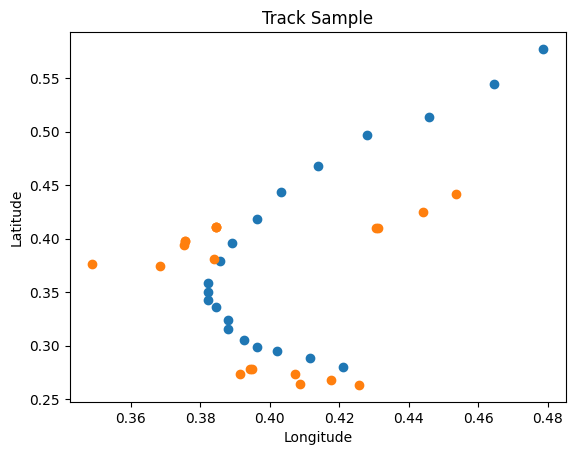

In [131]:
last_20_rows = test_y.tail(20)
last_20_rows_numpy_array = y_pred[-20:]

# 绘制图表
plt.scatter(last_20_rows['Longitude of the center'], last_20_rows['Latitude of the center'])
plt.scatter(last_20_rows_numpy_array[:, 0], last_20_rows_numpy_array[:, 1], label='numpy_array')

# 设置图表标题和轴标签
plt.title('Track Sample')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图表
plt.show()

In [129]:
print(mae)

0.13203516670252968
